In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'officer_jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
221026,Jersey,British Virgin Islands
221027,China,British Virgin Islands
221028,China,British Virgin Islands
221029,United States,British Virgin Islands
221030,Indonesia,British Virgin Islands
...,...,...
221136,Indonesia,Samoa
221137,Cayman Islands,Samoa
221138,British Virgin Islands,Samoa
221139,China,Samoa


In [5]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,British Virgin Islands,Cook Islands,1
1,British Virgin Islands,Samoa,1
2,British Virgin Islands,Seychelles,1
3,Canada,British Virgin Islands,1
4,Cayman Islands,British Virgin Islands,1
5,Cayman Islands,Samoa,1
6,China,British Virgin Islands,15
7,China,Labuan,1
8,China,Samoa,2
9,China,Singapore,1


### Convert Data to an Undirected Edge List

In [6]:
#df_jur_grouped_list = df_jur_grouped.values.tolist()
#df_jur_grouped_list

In [7]:
#d = collections.defaultdict(int)
##for n1, n2, v in df_jur_grouped_list:
#    d[min(n1, n2), max(n1, n2)] += v
#result = [[k[0], k[1], v] for k, v in d.items()]

In [8]:
#df_net = pd.DataFrame(result)
#df_net

In [9]:
#df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
#df_net

In [10]:
#import df_net to csv later

In [11]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


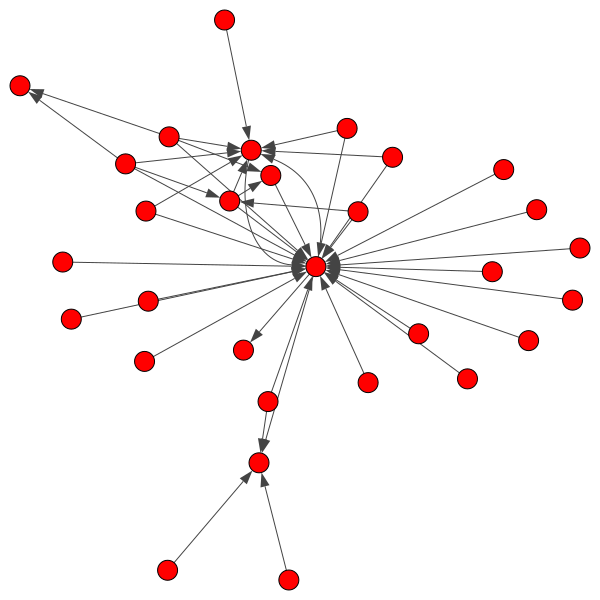

In [12]:
ig.plot(g)

In [13]:
g.diameter()

3

In [14]:
len(g.vs.indices)

30

In [15]:
#g.vs.indices
df_jur_grouped['node_start'].value_counts()

China                     4
Taiwan                    4
Singapore                 3
British Virgin Islands    3
Cayman Islands            2
US Virgin Islands         2
India                     2
Indonesia                 2
United States             2
Malaysia                  1
Italy                     1
Philippines               1
United Arab Emirates      1
South Korea               1
Samoa                     1
Jersey                    1
Macao                     1
Monaco                    1
Romania                   1
United Kingdom            1
Hong Kong                 1
New Zealand               1
Japan                     1
Thailand                  1
Fiji                      1
Czech Republic            1
Canada                    1
Name: node_start, dtype: int64

In [16]:
uni =df_jur_grouped['node_start'].unique()

In [17]:
len(uni)

27

In [18]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 0, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 1, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 2, {'name': 'Samoa'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 3, {'name': 'Seychelles'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 4, {'name': 'Canada'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 5, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 6, {'name': 'China'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 7, {'name': 'Labuan'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 8, {'name': 'Singapore'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 9, {'name': 'Czech Republic'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 10, {'name': 'Fiji'}),
 igraph.Vertex(<igraph.Graph object at 0x7fd067b35b80>, 11, {'name': 'Hong Kon

In [19]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [20]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,2.241379,0.01,3.0,-0.517222,1.413793,0.048751,1.625000
1,2,2.142857,0.01,3.0,-0.494715,1.357143,0.048469,1.625000
2,3,1.370370,0.02,3.0,-0.429875,1.370370,0.050754,1.506849
3,4,1.423077,0.02,3.0,-0.469792,1.384615,0.053254,1.513889
4,5,1.480000,0.03,3.0,-0.525230,1.400000,0.056000,1.521127


In [22]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
25,26,0.0,0.13,0.0,NaN,0.0,0.0,NaN
26,27,0.0,0.14,0.0,NaN,0.0,0.0,NaN
27,28,0.0,0.14,0.0,NaN,0.0,0.0,NaN
28,29,0.0,0.15,0.0,NaN,0.0,0.0,NaN
29,30,0.0,0.15,NaN,NaN,0.0,NaN,NaN


In [23]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,13.0,2.827586,-0.517222,3.896552,0.048751,1.625000
1,2,0.01,13.0,2.821429,-0.506882,4.000000,0.051020,1.620000
2,3,0.02,13.0,2.814815,-0.495517,4.111111,0.053498,1.614583
3,4,0.02,13.0,2.923077,-0.533297,4.230769,0.056213,1.621053
4,5,0.03,13.0,2.840000,-0.565630,4.360000,0.059200,1.593407


In [24]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
15,16,0.08,22.0,0.0,-0.639602,4.642857,0.066327,1.0
16,17,0.09,15.0,0.0,-0.670820,3.230769,0.065089,1.0
17,18,0.09,15.0,0.0,-0.666667,3.416667,0.069444,1.0
18,19,0.10,15.0,0.0,-0.661438,3.545455,0.074380,1.0
19,20,0.10,15.0,0.0,NaN,3.800000,0.080000,1.0
20,21,0.11,15.0,0.0,NaN,4.111111,0.086420,1.0
21,22,0.11,0.0,0.0,NaN,0.000000,0.000000,NaN
22,23,0.12,0.0,0.0,NaN,0.000000,0.000000,NaN
23,24,0.12,0.0,0.0,NaN,0.000000,0.000000,NaN
24,25,0.13,0.0,0.0,NaN,0.000000,0.000000,NaN


### Targeted attack

In [25]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [26]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [27]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
0,0,British Virgin Islands,94.0
2,2,Samoa,9.0
1,1,Cook Islands,5.0
11,11,Hong Kong,2.0
7,7,Labuan,2.0
8,8,Singapore,2.0
3,3,Seychelles,1.0
20,20,New Zealand,0.0
21,21,Philippines,0.0
22,22,Romania,0.0


In [28]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
0,0,British Virgin Islands,94.0
2,2,Samoa,9.0
1,1,Cook Islands,5.0
11,11,Hong Kong,2.0
7,7,Labuan,2.0
8,8,Singapore,2.0
3,3,Seychelles,1.0
20,20,New Zealand,0.0
21,21,Philippines,0.0
22,22,Romania,0.0


In [29]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [30]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Samoa',
 'Cook Islands',
 'Hong Kong',
 'Labuan',
 'Singapore',
 'Seychelles',
 'New Zealand',
 'Philippines',
 'Romania',
 'South Korea',
 'Thailand',
 'Taiwan',
 'Malaysia',
 'US Virgin Islands',
 'United Arab Emirates',
 'United Kingdom',
 'Monaco',
 'Japan',
 'Macao',
 'Jersey',
 'Italy',
 'Indonesia',
 'India',
 'Fiji',
 'Czech Republic',
 'China',
 'Cayman Islands',
 'Canada',
 'United States']

In [31]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [32]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,0.103448,2.0,-0.237508,0.551724,0.019025,1.157895
1,2,0.01,Samoa,0.071429,2.0,-0.632456,0.321429,0.011480,1.181818
2,3,0.02,Cook Islands,0.074074,2.0,NaN,0.222222,0.008230,1.250000
3,4,0.02,Hong Kong,0.000000,1.0,NaN,0.153846,0.005917,1.000000
4,5,0.03,Labuan,0.000000,1.0,NaN,0.080000,0.003200,1.000000


In [34]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
25,26,0.13,Czech Republic,0.0,0.0,NaN,0.0,0.0,NaN
26,27,0.14,China,0.0,0.0,NaN,0.0,0.0,NaN
27,28,0.14,Cayman Islands,0.0,0.0,NaN,0.0,0.0,NaN
28,29,0.15,Canada,0.0,0.0,NaN,0.0,0.0,NaN
29,30,0.15,United States,0.0,NaN,NaN,0.0,NaN,NaN


In [35]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,0.120690,2.0,-0.237508,0.620690,0.019025,1.157895
1,2,0.01,Samoa,0.071429,2.0,-0.632456,0.357143,0.011480,1.181818
2,3,0.02,Cook Islands,0.074074,2.0,NaN,0.222222,0.008230,1.250000
3,4,0.02,Hong Kong,0.000000,1.0,NaN,0.153846,0.005917,1.000000
4,5,0.03,Labuan,0.000000,1.0,NaN,0.080000,0.003200,1.000000
5,6,0.03,Singapore,0.000000,0.0,NaN,0.000000,0.000000,NaN
6,7,0.04,Seychelles,0.000000,0.0,NaN,0.000000,0.000000,NaN
7,8,0.04,New Zealand,0.000000,0.0,NaN,0.000000,0.000000,NaN
8,9,0.05,Philippines,0.000000,0.0,NaN,0.000000,0.000000,NaN
9,10,0.05,Romania,0.000000,0.0,NaN,0.000000,0.000000,NaN


In [36]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,0.120690,2.0,-0.237508,0.620690,0.019025,1.157895
1,2,0.01,Samoa,0.071429,2.0,-0.632456,0.357143,0.011480,1.181818
2,3,0.02,Cook Islands,0.074074,2.0,NaN,0.222222,0.008230,1.250000
3,4,0.02,Hong Kong,0.000000,1.0,NaN,0.153846,0.005917,1.000000
4,5,0.03,Labuan,0.000000,1.0,NaN,0.080000,0.003200,1.000000
5,6,0.03,Singapore,0.000000,0.0,NaN,0.000000,0.000000,NaN
6,7,0.04,Seychelles,0.000000,0.0,NaN,0.000000,0.000000,NaN
7,8,0.04,New Zealand,0.000000,0.0,NaN,0.000000,0.000000,NaN
8,9,0.05,Philippines,0.000000,0.0,NaN,0.000000,0.000000,NaN
9,10,0.05,Romania,0.000000,0.0,NaN,0.000000,0.000000,NaN


#### Unweighted

In [37]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted

#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

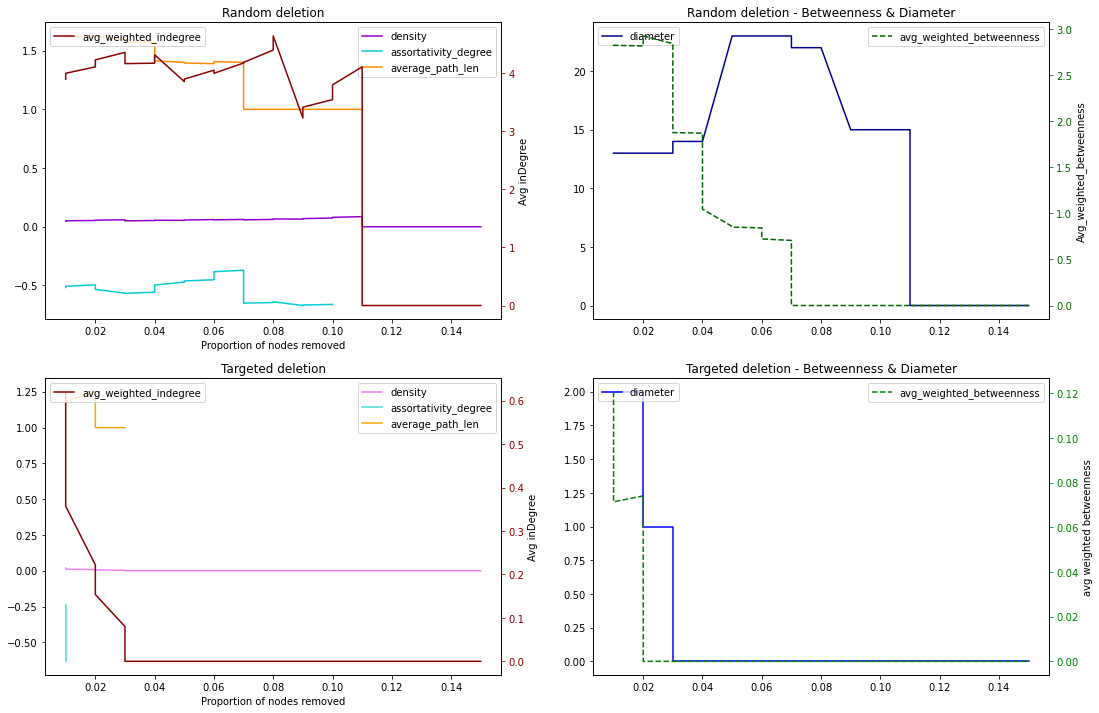

In [38]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax[0,0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[1,0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()